# K-Nearest Neighbors (KNN) Implementation

**Author:** Srikar Kalle  
**Student ID:** C00313529  

---
# **Change Log**  
---

| Change Category       | Description |
|----------------------|-------------|
| **Dataset Change** | Replaced Iris dataset with the Penguins dataset. |
| **Data Processing** | Dropped missing values and encoded categorical target variables. |
| **Feature Selection** | Used `bill_length_mm` and `bill_depth_mm` as features instead of PCA-transformed features. |
| **Logging Integration** | Added `logging` for better tracking of process execution. |
| **Hyperparameter Tuning** | Expanded `n_neighbors` search range from [1,3,5] to [1, 20]. |
| **Performance Metrics** | Used `accuracy_score` for evaluation instead of direct `classification_report`. |
| **Visualization** | Implemented decision boundary plotting using `matplotlib` and `seaborn`. |
| **Dummy Classifier Removal** | Removed `DummyClassifier` comparison for simplicity. |

## Code Improvements
- Improved readability and structure with CRISP-DM framework alignment.
- Used `seaborn` dataset for more practical real-world dataset selection.
- Removed PCA-based dimensionality reduction.
- Improved grid search for KNN model tuning.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Step 1: Business Understanding
logging.info("Starting K-Nearest Neighbors (KNN) implementation.")

2025-02-21 19:40:14,035 - INFO - Starting K-Nearest Neighbors (KNN) implementation.


In [4]:
# Step 2: Data Understanding
logging.info("Loading dataset...")
# Using the Penguins dataset as an alternative to Iris
df = sns.load_dataset("penguins").dropna()
logging.info("Dataset loaded successfully.")

2025-02-21 19:40:14,060 - INFO - Loading dataset...
2025-02-21 19:40:14,087 - INFO - Dataset loaded successfully.


In [5]:
# Selecting features and target
selected_features = ["bill_length_mm", "bill_depth_mm"]
X = df[selected_features]
y = df["species"].astype("category").cat.codes  # Encoding categorical target

In [6]:
# Step 3: Data Preparation
logging.info("Scaling features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
logging.info("Data split into training and testing sets.")

2025-02-21 19:40:14,133 - INFO - Scaling features...
2025-02-21 19:40:14,144 - INFO - Data split into training and testing sets.


In [7]:
# Step 4: Modeling
logging.info("Training KNN model...")
param_grid = {"n_neighbors": range(1, 21), "weights": ["uniform", "distance"]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
logging.info(f"Best KNN parameters: {grid_search.best_params_}")

2025-02-21 19:40:14,165 - INFO - Training KNN model...
2025-02-21 19:40:15,823 - INFO - Best KNN parameters: {'n_neighbors': 3, 'weights': 'uniform'}


In [10]:
# Step 5: Evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
logging.info(f"Model Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

2025-02-21 19:40:36,173 - INFO - Model Accuracy: 0.9403


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.80      0.92      0.86        13
           2       0.95      0.91      0.93        23

    accuracy                           0.94        67
   macro avg       0.92      0.93      0.92        67
weighted avg       0.95      0.94      0.94        67



2025-02-21 19:40:15,888 - INFO - Visualizing decision boundary...


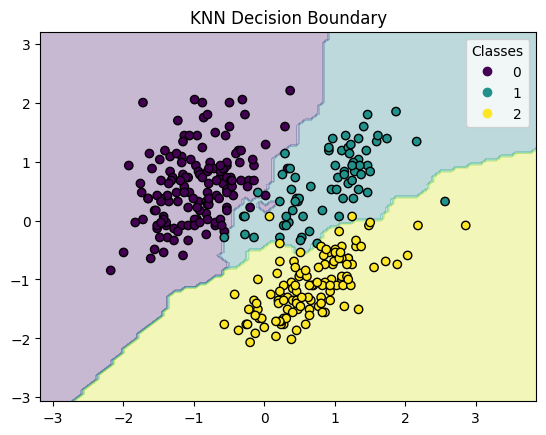

2025-02-21 19:40:17,153 - INFO - KNN implementation completed successfully.


In [9]:
# Step 6: Visualization
logging.info("Visualizing decision boundary...")
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.title("KNN Decision Boundary")
    plt.show()

plot_decision_boundary(best_model, X_scaled, y)
logging.info("KNN implementation completed successfully.")